<a href="https://colab.research.google.com/github/boniluboni/CLUSTERS/blob/main/GRAFICOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_principal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BASES/BASE_FINAL.xlsx', sheet_name= 'PRINCIPAL')

In [ ]:
df_principal.head(3)

,ANO_BO,CIDADE,DATA_OCORRENCIA,DESCRICAOLOCAL,FLAGRANTE,PERIODO_OCORRENCIA,REGIAO,UF,LAT,LON,DIA_DA_SEMANA,DIA_DO_MES,MÊS,HORA
0,2021,AGUAS DE LINDOIA,2021-10-11,VIA PÚBLICA,NÃO,MANHA,CAMPINAS,SP,"-22,473822","-46,631778",SEG,11,10,6
1,2021,ALTINOPOLIS,2021-12-29,UNIDADE RURAL,NÃO,NOITE,RIBEIRÃO PRETO,SP,"-21,024582","-47,373280",QUA,29,12,19
2,2021,ALUMINIO,2021-02-14,VIA PÚBLICA,NÃO,NOITE,SOROCABA,SP,"-23,533373","-47,259056",DOM,14,2,18


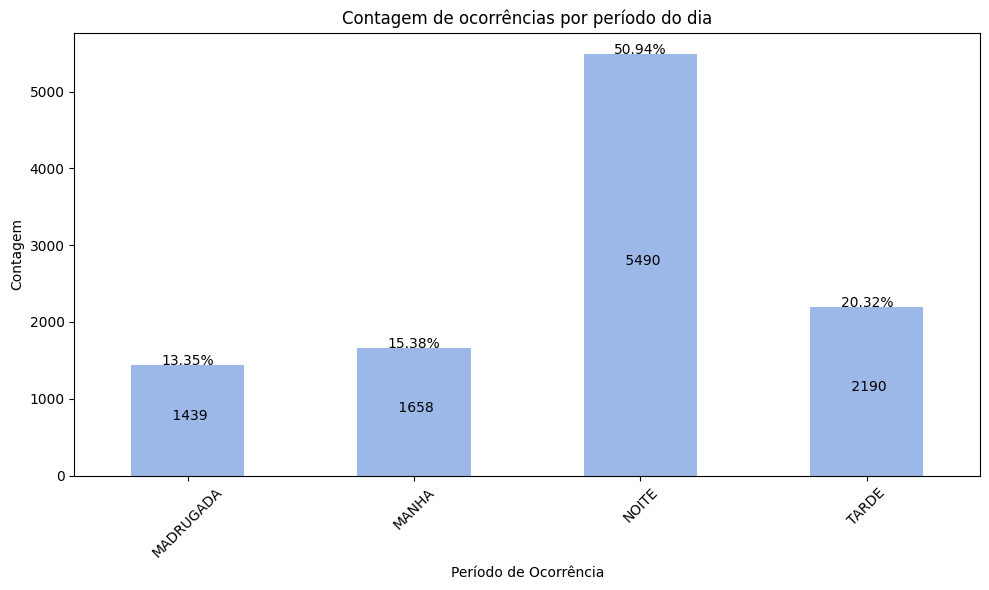

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = df_principal


contagem_por_periodo = df['PERIODO_OCORRENCIA'].value_counts().sort_index()

total_ocorrencias = contagem_por_periodo.sum()
percentuais = [(contagem / total_ocorrencias) * 100 for contagem in contagem_por_periodo]


cor_azul_pastel = '#9bb8e8'


plt.figure(figsize=(10, 6))
ax = contagem_por_periodo.plot(kind='bar', color=cor_azul_pastel)
plt.xlabel('Período de Ocorrência')
plt.ylabel('Contagem')
plt.title('Contagem de ocorrências por período do dia')
plt.xticks(rotation=45)


for i, (contagem, percentual) in enumerate(zip(contagem_por_periodo, percentuais)):
    x = i
    y_contagem = contagem / 2
    y_percentual = contagem + 1.5
    ax.text(x, y_contagem, f' {contagem}', ha='center', color='black')
    ax.text(x, y_percentual, f'{percentual:.2f}%', ha='center', color='black')

plt.tight_layout()

# Mostrando o gráfico
plt.show()


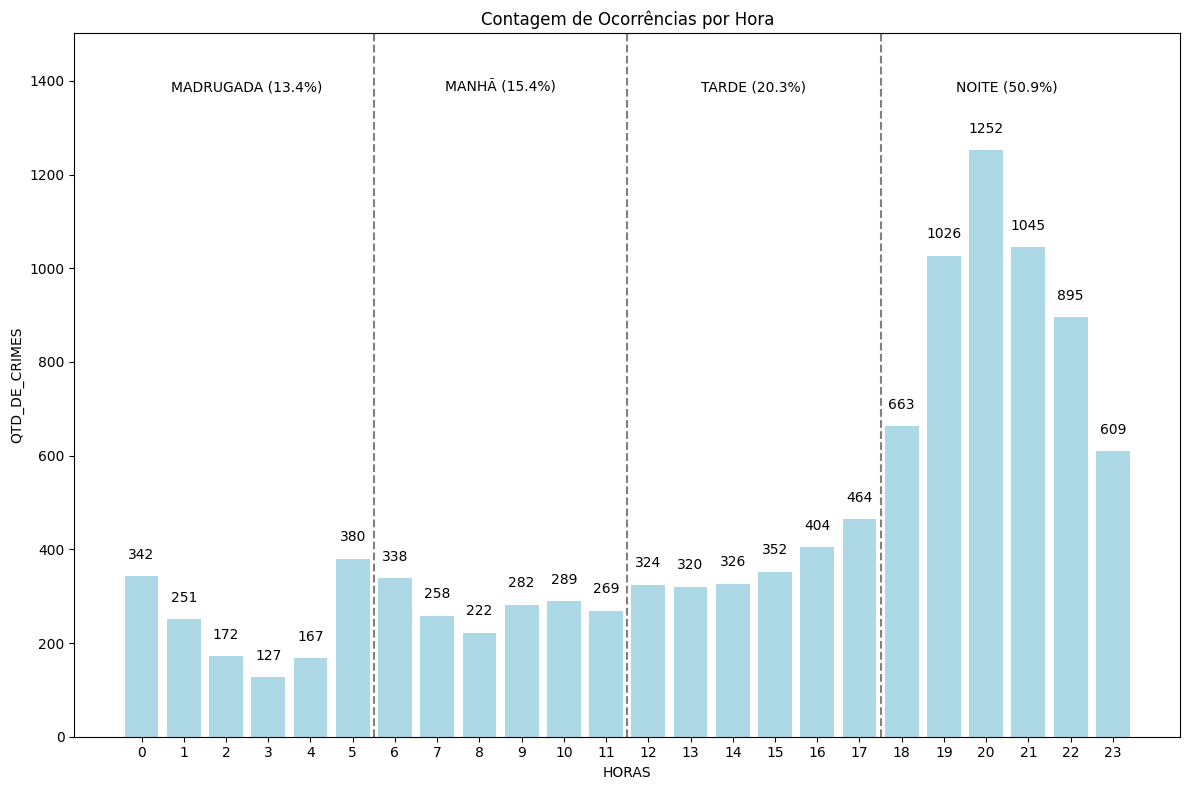

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que df_principal seja seu DataFrame e já contenha a coluna 'HORA'

# Carregar a planilha Excel em um DataFrame do pandas
df = df_principal

# Contar as ocorrências de cada valor na coluna 'HORA'
contagem_horas = df['HORA'].value_counts()

# Ordenar as contagens por valor de hora
contagem_horas = contagem_horas.sort_index()

# Calcular o total de ocorrências para o cálculo de percentuais
total_ocorrencias = contagem_horas.sum()

# Calcular percentuais para cada período do dia
percentuais = {
    'MADRUGADA': contagem_horas.loc[0:5].sum() / total_ocorrencias * 100,
    'MANHÃ': contagem_horas.loc[6:11].sum() / total_ocorrencias * 100,
    'TARDE': contagem_horas.loc[12:17].sum() / total_ocorrencias * 100,
    'NOITE': contagem_horas.loc[18:23].sum() / total_ocorrencias * 100,
}

# Definir o tamanho da figura (largura, altura) em polegadas
plt.figure(figsize=(12, 8))  # Ajustar o tamanho conforme necessário

# Criar o gráfico de colunas com a cor azul pastel
plt.bar(contagem_horas.index, contagem_horas.values, color='lightblue')

# Adicionar os valores em cima das colunas
for index, value in enumerate(contagem_horas.values):
    plt.text(index, value + max(contagem_horas.values) * 0.03, str(value), ha='center', color='black')

# Configurar o título e os rótulos do gráfico
plt.title('Contagem de Ocorrências por Hora')
plt.xlabel('HORAS')
plt.ylabel('QTD_DE_CRIMES')

# Ajustar a escala do eixo y para melhor visualização
plt.ylim(0, max(contagem_horas.values) * 1.2)  # Adiciona espaço no topo

# Adicionar linhas verticais e rótulos para as divisões do dia com percentuais
plt.axvline(x=5.5, color='gray', linestyle='--')
plt.axvline(x=11.5, color='gray', linestyle='--')
plt.axvline(x=17.5, color='gray', linestyle='--')

plt.text(2.5, max(contagem_horas.values) * 1.1, f'MADRUGADA ({percentuais["MADRUGADA"]:.1f}%)', ha='center', color='black', fontsize=10)
plt.text(8.5, max(contagem_horas.values) * 1.1, f'MANHÃ ({percentuais["MANHÃ"]:.1f}%)', ha='center', color='black', fontsize=10)
plt.text(14.5, max(contagem_horas.values) * 1.1, f'TARDE ({percentuais["TARDE"]:.1f}%)', ha='center', color='black', fontsize=10)
plt.text(20.5, max(contagem_horas.values) * 1.1, f'NOITE ({percentuais["NOITE"]:.1f}%)', ha='center', color='black', fontsize=10)

# Ajustar o eixo x para exibir todos os valores da coluna HORA
plt.xticks(range(0, 24))

# Exibir o gráfico
plt.tight_layout()  # Ajustar automaticamente os parâmetros do subplot para dar espaço ao gráfico
plt.show()


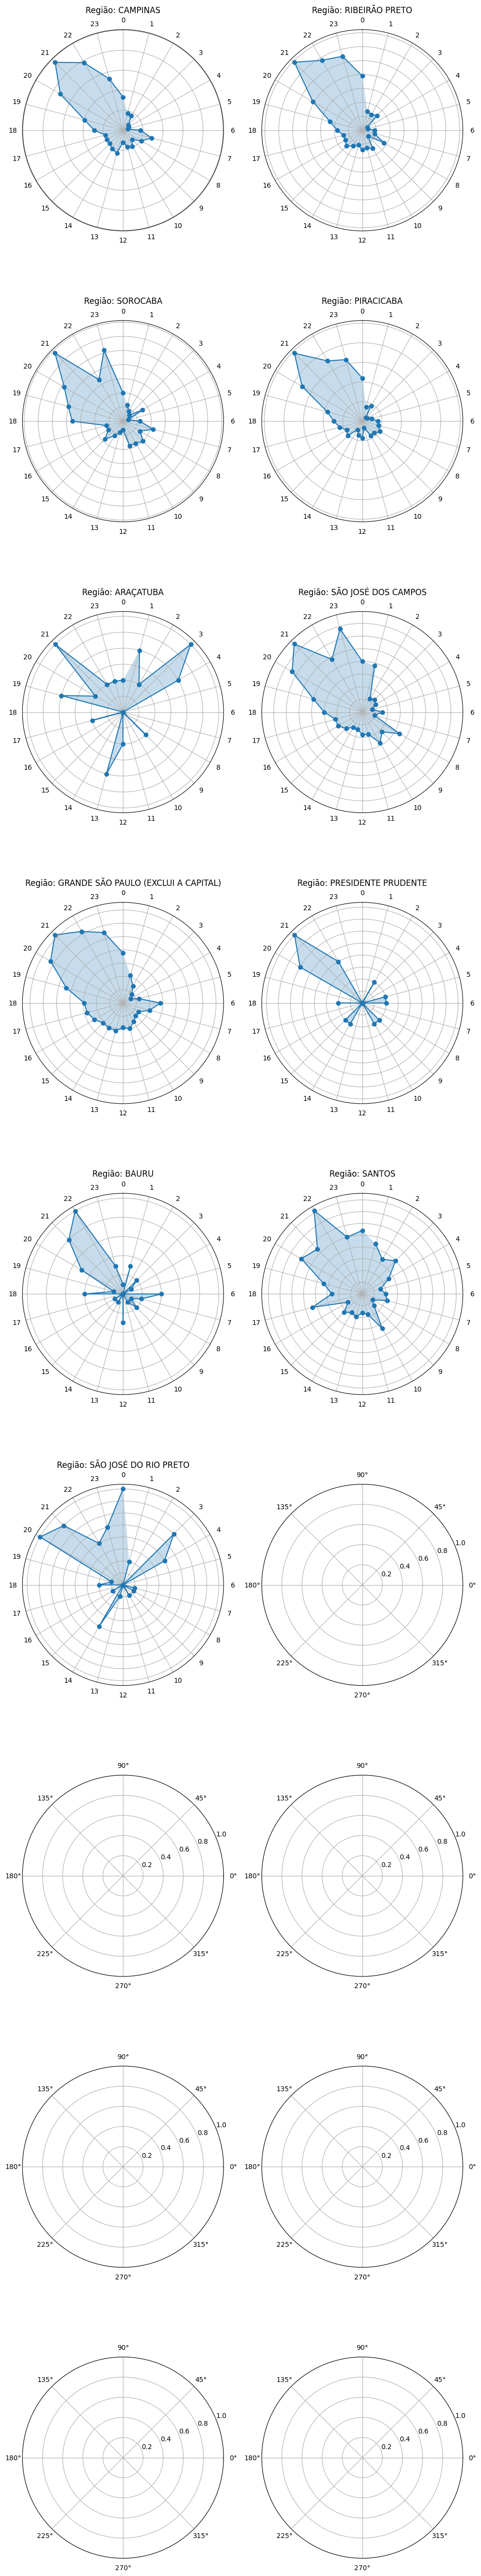

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do Excel para um DataFrame (substitua pelo caminho do seu arquivo Excel)
#excel_file = "caminho/para/seu/arquivo.xlsx"
df = df_principal

# Lista de regiões únicas
regioes_unicas = df['REGIAO'].unique()

# Número de linhas e colunas para a grade de subplots
num_rows = len(regioes_unicas) - 2
num_cols = 2  # Dois subplots por linha

# Criação da grade de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows), subplot_kw={'projection': 'polar'})

for i, regiao in enumerate(regioes_unicas):
    # Filtrar os dados para a região atual
    df_regiao = df[df['REGIAO'] == regiao]

    # Calcular a contagem de crimes por hora
    crime_counts = df_regiao.groupby('HORA').size()

    # Criar um gráfico de radar
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # Sentido horário
    crime_values = np.array([crime_counts.get(hora, 0) for hora in range(23, -1, -1)])
    ax.plot(angles, crime_values, marker='o')
    ax.fill(angles, crime_values, alpha=0.25)
    ax.set_title(f'Região: {regiao}')

    rotated_labels = [f'{i}:00' for i in range(0, 23)] + ['0:00']
    ax.set_xticks(angles)
    ax.set_xticklabels([f'{i}:00' for i in range(23, -1, -1)])

    labels = ["0", "23", "22", "21", "20", "19", "18", "17", "16", "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"]
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)

    ax.set_theta_offset(np.pi / 2)
    ax.set_rlabel_position(360)
    ax.set_yticklabels([])
    ax.grid(True)

# Ajustar o layout e exibir os subplots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Supondo que df seja o seu DataFrame e ele já contenha as colunas DIA_DA_SEMANA e HORA

# Ordem desejada para os dias da semana
dias_ordenados = ['SEG', 'TER', 'QUA', 'QUI', 'SEX', 'SÁB', 'DOM']

# Criar a tabela pivot
pivot_table = pd.pivot_table(df, index='DIA_DA_SEMANA', columns='HORA', aggfunc='size', fill_value=0)

# Reindexar as linhas de acordo com a ordem desejada
pivot_table = pivot_table.reindex(dias_ordenados)

# Aplicar gradiente de cor com ajustes para suavidade
styled_pivot = pivot_table.style.background_gradient(cmap='viridis', axis=None, low=0.9, high=0.0)

# Exibir a tabela colorida
styled_pivot


HORA,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
DIA_DA_SEMANA,,,,,,,,,,,,,,,,,,,,,,,,
SEG,45,34,22,19,22,59,44,31,27,36,30,30,43,51,48,45,42,55,96,148,169,124,109,76
TER,47,26,15,12,30,39,49,38,41,38,45,40,44,47,46,56,67,58,106,145,185,165,139,74
QUA,38,26,17,12,16,41,60,42,32,44,39,42,50,42,55,48,53,63,96,154,184,157,124,82
QUI,52,37,25,15,23,47,55,39,32,45,46,52,50,37,51,61,58,88,79,169,234,160,143,101
SEX,56,31,28,19,23,59,37,43,41,47,51,37,55,59,41,52,62,68,107,156,191,172,140,100
SÁB,52,43,27,20,30,73,43,40,31,42,41,36,36,40,44,43,53,63,93,147,166,143,139,98
DOM,52,54,38,30,23,62,50,25,18,30,37,32,46,44,41,47,69,69,86,107,123,124,101,78


In [ ]:
import pandas as pd
import numpy as np

# Suponha que df seja o seu DataFrame e ele já contenha as colunas DIA_DA_SEMANA e HORA

# Ordem desejada para os dias da semana
dias_ordenados = ['SEG', 'TER', 'QUA', 'QUI', 'SEX', 'SÁB', 'DOM']

# Criar a tabela pivot
pivot_table = pd.pivot_table(df, index='DIA_DA_SEMANA', columns='HORA', aggfunc='size', fill_value=0)

# Reindexar as linhas de acordo com a ordem desejada
pivot_table = pivot_table.reindex(dias_ordenados)

# Aplicar gradiente de cor com ajustes para suavidade
styled_pivot = pivot_table.style.background_gradient(cmap='viridis', axis=None, low=0.9, high=0.0) \
    .format(lambda x: '')

# Exibir a tabela colorida sem os números
styled_pivot


HORA,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
DIA_DA_SEMANA,,,,,,,,,,,,,,,,,,,,,,,,
SEG,,,,,,,,,,,,,,,,,,,,,,,,
TER,,,,,,,,,,,,,,,,,,,,,,,,
QUA,,,,,,,,,,,,,,,,,,,,,,,,
QUI,,,,,,,,,,,,,,,,,,,,,,,,
SEX,,,,,,,,,,,,,,,,,,,,,,,,
SÁB,,,,,,,,,,,,,,,,,,,,,,,,
DOM,,,,,,,,,,,,,,,,,,,,,,,,


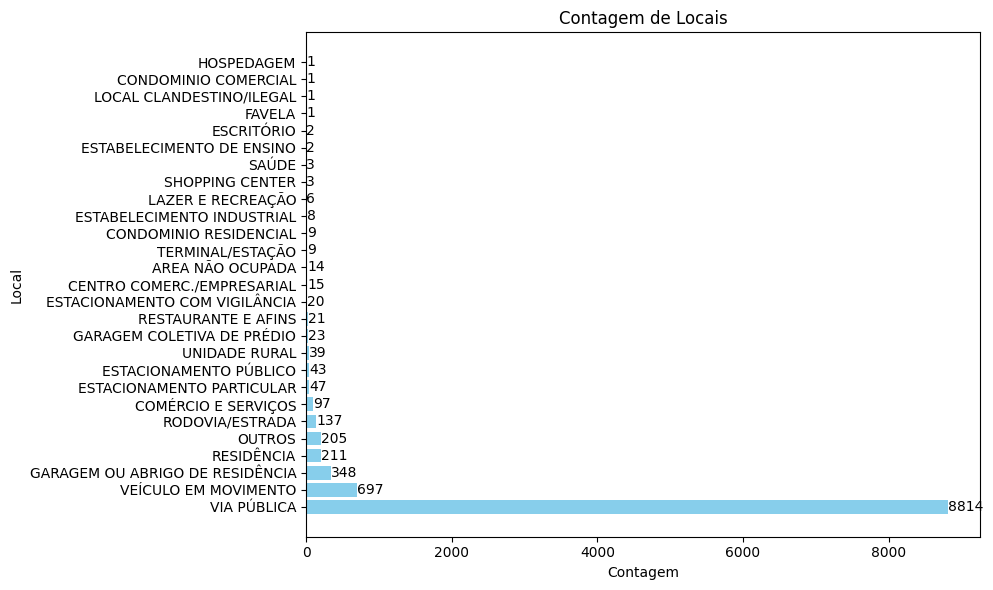

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do arquivo Excel
df_principal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BASES/BASE_FINAL.xlsx', sheet_name='PRINCIPAL')

# Contando quantas vezes cada local aparece
contagem_locais = df_principal['DESCRICAOLOCAL'].value_counts()

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_locais.index, contagem_locais.values, color='skyblue')

# Adicionando os valores em cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left')

plt.title('Contagem de Locais')
plt.ylabel('Local')
plt.xlabel('Contagem')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do Excel para um DataFrame (substitua pelo caminho do seu arquivo Excel)
excel_file = "caminho/para/seu/arquivo.xlsx"
df = df_orig

# Lista de regiões únicas
regioes_unicas = df['REGIAO'].unique()

# Número de linhas e colunas para a grade de subplots
num_rows = len(regioes_unicas) - 2
num_cols = 2  # Dois subplots por linha

# Criação da grade de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6 * num_rows), subplot_kw={'projection': 'polar'})

for i, regiao in enumerate(regioes_unicas):
    # Filtrar os dados para a região atual
    df_regiao = df[df['REGIAO'] == regiao]

    # Calcular a contagem de crimes por hora
    crime_counts = df_regiao.groupby('HORA').size()

    # Criar um gráfico de radar
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # Sentido horário
    crime_values = np.array([crime_counts.get(hora, 0) for hora in range(23, -1, -1)])
    ax.plot(angles, crime_values, marker='o')
    ax.fill(angles, crime_values, alpha=0.25)
    ax.set_title(f'Região: {regiao}')

    rotated_labels = [f'{i}:00' for i in range(0, 23)] + ['0:00']
    ax.set_xticks(angles)
    ax.set_xticklabels([f'{i}:00' for i in range(23, -1, -1)])

    labels = ["0", "23", "22", "21", "20", "19", "18", "17", "16", "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"]
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)

    ax.set_theta_offset(np.pi / 2)
    ax.set_rlabel_position(360)
    ax.set_yticklabels([])
    ax.grid(True)

# Ajustar o layout e exibir os subplots
plt.tight_layout()
plt.show()
